# Contextualización y Diccionario de Datos

Este ejercicio tiene como propósito guiar en el análisis de un conjunto de datos correspondiente a incendios forestales en el Parque Nacional de Montesinho, Portugal. El objetivo es aplicar técnicas de análisis exploratorio, selección de variables y regresión lineal, desarrollando competencias analíticas y críticas alrededor del uso de datos reales.

Se analizarán variables meteorológicas, temporales y espaciales, con el fin de comprender los factores que influyen en la extensión de los incendios forestales (área afectada).

## Diccionario de Datos

| Variable | Descripción |
| --- | --- |
| X | Coordenada espacial X dentro de un grid (valor entero, [1, 9]) |
| Y | Coordenada espacial Y dentro de un grid (valor entero, [2, 9]) |
| month | Mes del año en el que ocurrió el incendio (valores texto: 'jan', 'feb', ..., 'dec') |
| day | Día de la semana en el que ocurrió el incendio (valores texto: 'mon', 'tue', ..., 'sun') |
| FFMC | Índice de humedad de combustibles finos (Fine Fuel Moisture Code, numérico) |
| DMC | Código de humedad del material orgánico duff (Duff Moisture Code, numérico) |
| DC | Código de sequedad (Drought Code, numérico) |
| ISI | Índice inicial de propagación del incendio (Initial Spread Index, numérico) |
| temp | Temperatura máxima registrada el día del incendio (°C) |
| RH | Humedad relativa (%) |
| wind | Velocidad del viento (km/h) |
| rain | Precipitación (mm/m²) |
| area | Área quemada por el incendio (hectáreas, valor continuo, incluye ceros) |

# 2. Exploración y descripción inicial del dataset

En esta sección se realizará la carga de los datos y una exploración descriptiva preliminar, incluyendo visualizaciones básicas para familiarizarse con la distribución, tendencias y posibles anomalías del conjunto de datos.

## Instrucciones

1. Revise que los datos se hayan cargado correctamente y observe la estructura de las primeras filas.
2. Obtenga información general del dataset:
    - Número de filas y columnas
    - Tipos de datos por columna
    - Número de valores faltantes por variable
    - Estadísticas descriptivas para las variables numéricas
3. Visualice distribuciones y relaciones relevantes con diferentes tipos de gráficos:
    - Histogramas de variables numéricas
    - Conteo de categorías para variables de meses o días
    - Matriz de correlación de variables numéricas
    - Gráfico de caja (boxplot) para examinar outliers en 'area'

In [17]:
# Visualización de las primeras filas del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste la ruta del archivo si es necesario
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [18]:
# Información básica del dataset
print('Dimensiones del dataset (filas, columnas):', df.shape)
print('\nTipos de datos:')
print(df.dtypes)
print('\nValores nulos por columna:')
print(df.isnull().sum())
print('\nEstadísticas descriptivas:')
print(df.describe())

Dimensiones del dataset (filas, columnas): (517, 13)

Tipos de datos:
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Valores nulos por columna:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Estadísticas descriptivas:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000 

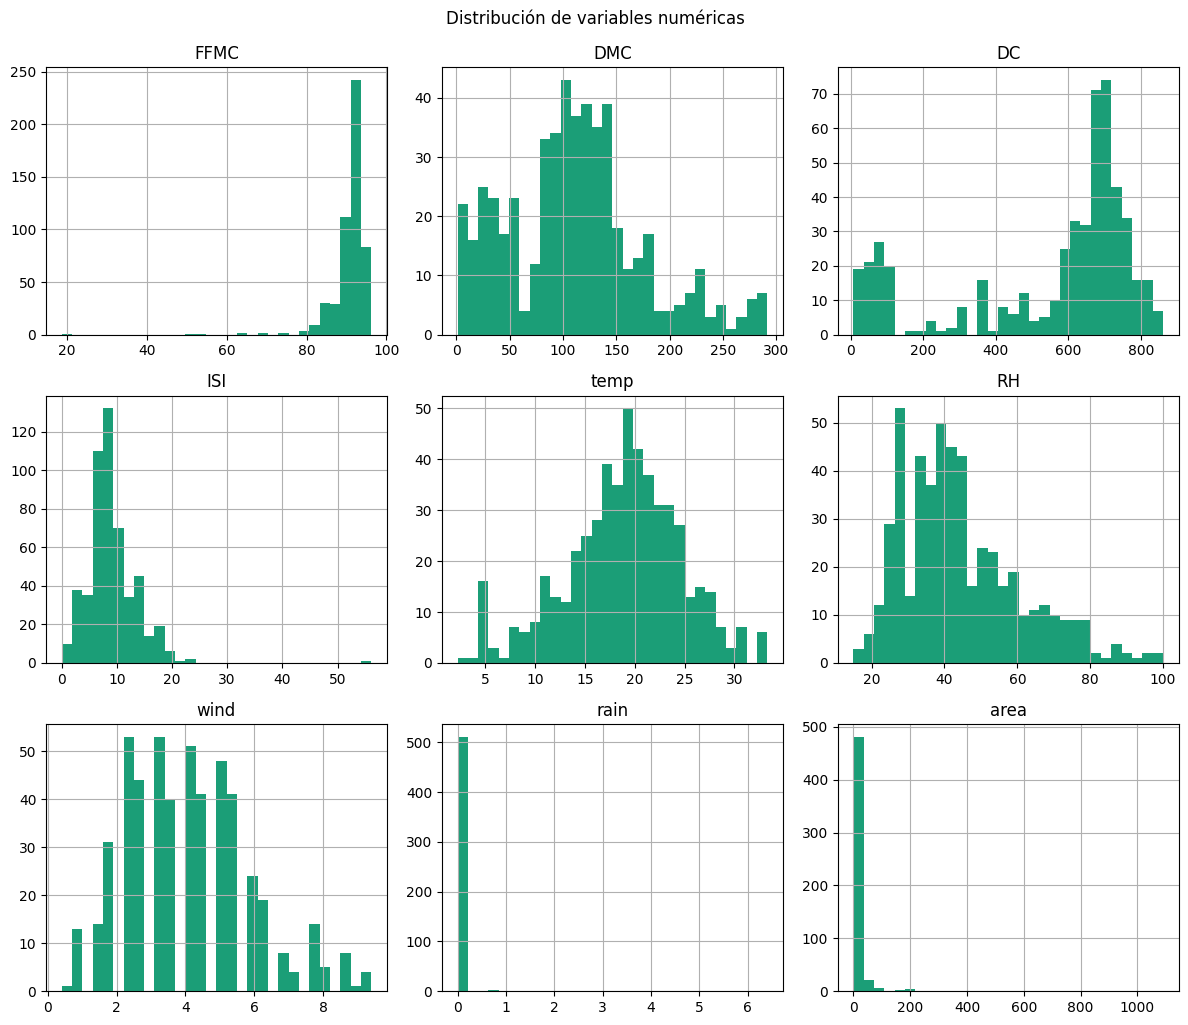

In [19]:
# Histogramas de variables numéricas
columnas_numericas = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
df[columnas_numericas].hist(bins=30, figsize=(12,10), color='#1b9e77')
plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.show()

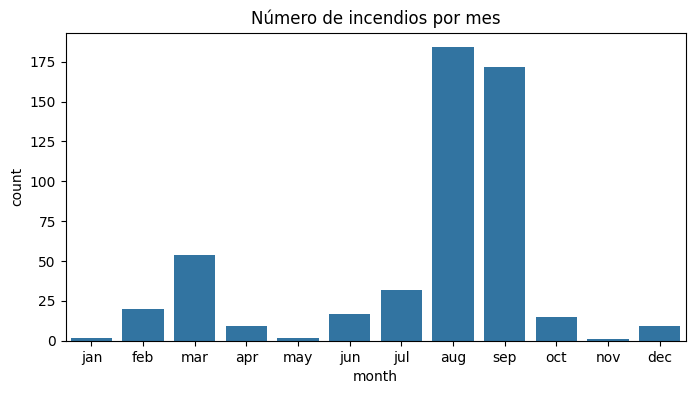

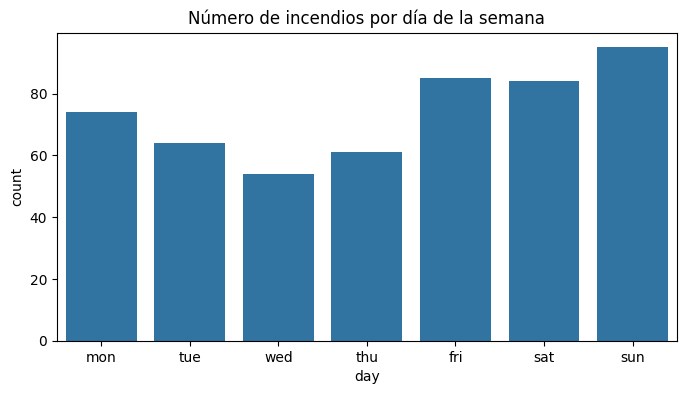

In [20]:
# Distribución de incendios por mes y por día de la semana
plt.figure(figsize=(8,4))
sns.countplot(x='month', data=df, order=[
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
])
plt.title('Número de incendios por mes')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='day', data=df, order=[
    'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'
])
plt.title('Número de incendios por día de la semana')
plt.show()

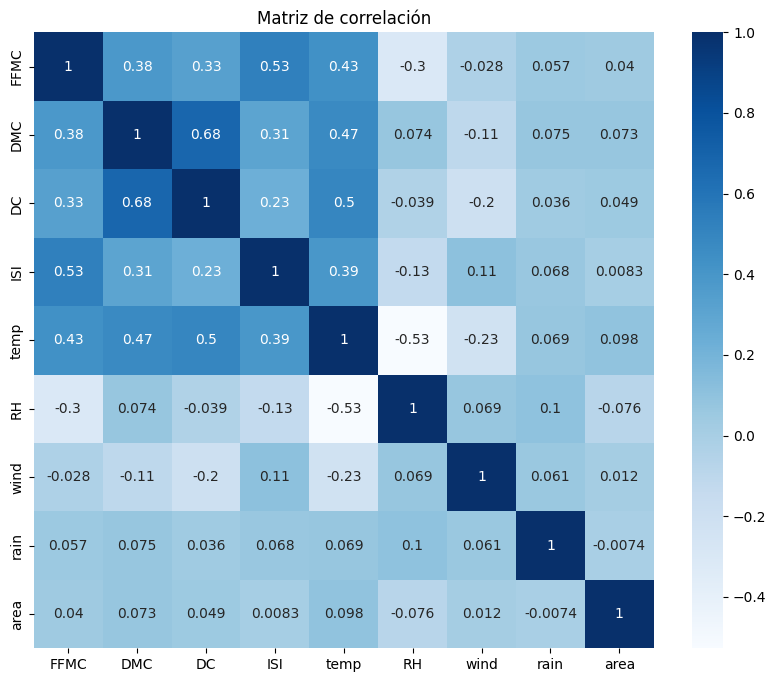

In [21]:
# Matriz de correlación de variables numéricas
import numpy as np
correlation = df[columnas_numericas].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Matriz de correlación')
plt.show()

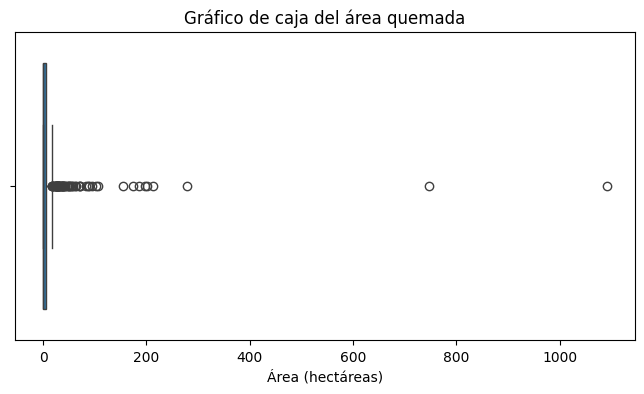

In [22]:
# Boxplot del área quemada para identificar valores atípicos
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='area')
plt.title('Gráfico de caja del área quemada')
plt.xlabel('Área (hectáreas)')
plt.show()

# 3. Limpieza y procesamiento de datos

Esta sección tiene como finalidad asegurar la calidad y consistencia del conjunto de datos antes de realizar análisis más detallados.

Ahora realice los siguientes procedimientos:

1. Identifique y gestione valores nulos o perdidos.
2. Verifique y elimine registros duplicados.
3. Revise los formatos de las variables categóricas y numéricas.
4. Analice y gestione valores atípicos (outliers) en la variable 'area' utilizando la técnica de capado (“caps/winsorización”), limitando los valores extremos a un percentil especificado.
5. Documente cualquier decisión o cambio realizado sobre los datos que pueda afectar los análisis posteriores.

Valores nulos por columna:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
Número de filas duplicadas: 4

Tipos de datos después del ajuste:
X           int64
Y           int64
month    category
day      category
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
dtype: object


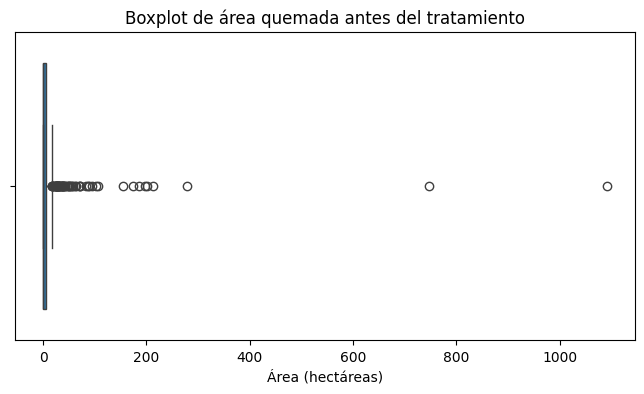

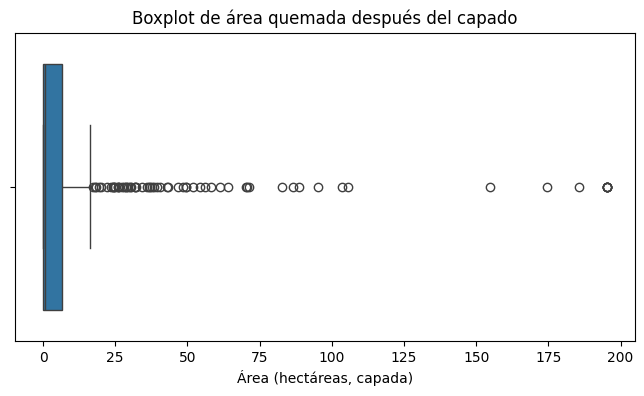


Estadísticas descriptivas originales de "area":
count     513.000000
mean       12.891598
std        63.892586
min         0.000000
25%         0.000000
50%         0.540000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

Estadísticas descriptivas después del capado:
count    513.000000
mean       9.860822
std       28.137254
min        0.000000
25%        0.000000
50%        0.540000
75%        6.570000
max      195.193600
Name: area_capped, dtype: float64


In [23]:
# 1. Identificación de valores nulos
print('Valores nulos por columna:')
print(df.isnull().sum())

# 2. Eliminación de registros duplicados
duplicados = df.duplicated().sum()
print(f'Número de filas duplicadas: {duplicados}')
df = df.drop_duplicates()

# 3. Ajuste los tipos de datos
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
print('\nTipos de datos después del ajuste:')
print(df.dtypes)

# 4. Tratamiento de outliers con 'caps' en el área
lower_cap = df['area'].quantile(0.01)
upper_cap = df['area'].quantile(0.99)
df['area_capped'] = df['area'].clip(lower=lower_cap, upper=upper_cap)

# Visualización antes y después del capado
plt.figure(figsize=(8,4))
sns.boxplot(x=df['area'])
plt.title('Boxplot de área quemada antes del tratamiento')
plt.xlabel('Área (hectáreas)')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['area_capped'])
plt.title('Boxplot de área quemada después del capado')
plt.xlabel('Área (hectáreas, capada)')
plt.show()

print('\nEstadísticas descriptivas originales de "area":')
print(df['area'].describe())
print('\nEstadísticas descriptivas después del capado:')
print(df['area_capped'].describe())

## Reflexione y documente

- Si encuentra valores nulos o duplicados, describa qué acciones tomó y por qué.
- Justifique el uso del capado en la variable 'area', especifique los percentiles utilizados y analice el impacto en los análisis posteriores.
- Si realiza transformaciones adicionales, por ejemplo, aplicar logaritmo a 'area' para reducir sesgo, documente el motivo.

# 4. Selección de variables y visualización de relaciones

En esta sección se recomienda seleccionar las variables que contribuirán como explicativas en el modelo de regresión lineal. Realice los siguientes pasos:

1. Revise la matriz de correlaciones y los resultados de la exploración para identificar variables numéricas (y eventualmente categóricas) con mayor relación respecto a la variable dependiente 'area'.
2. Elabore scatterplots (diagramas de dispersión) entre 'area' y las posibles variables explicativas seleccionadas para analizar la linealidad y la presencia de patrones.
3. Justifique la selección de variables con base en la exploración visual y el análisis previo.

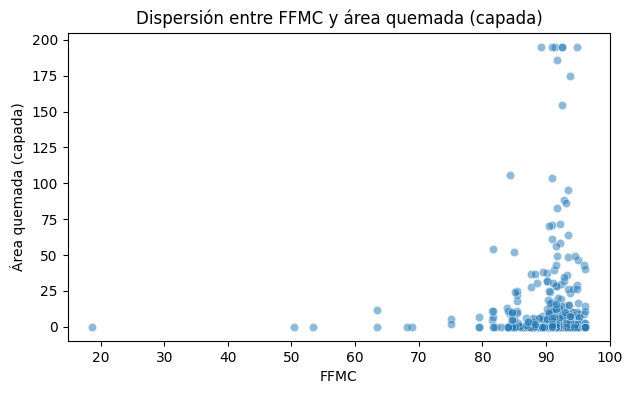

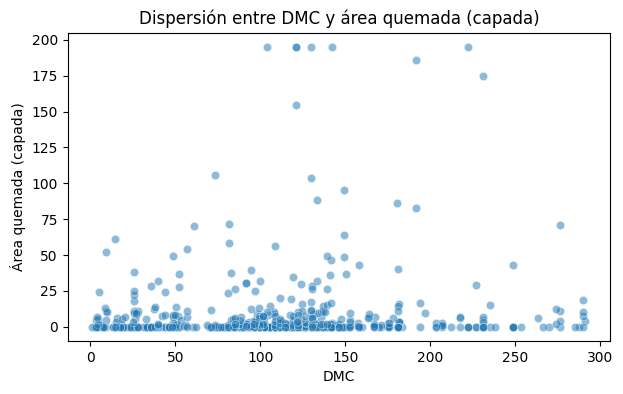

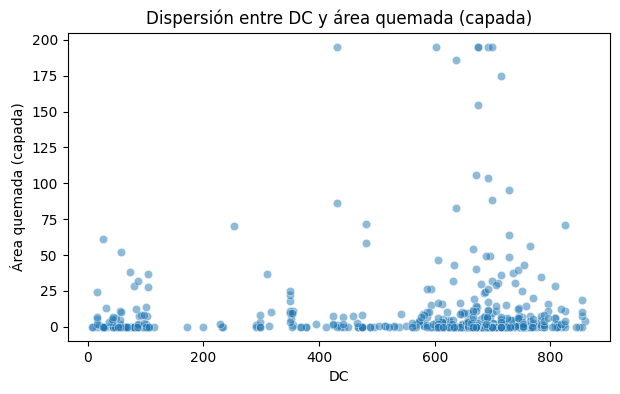

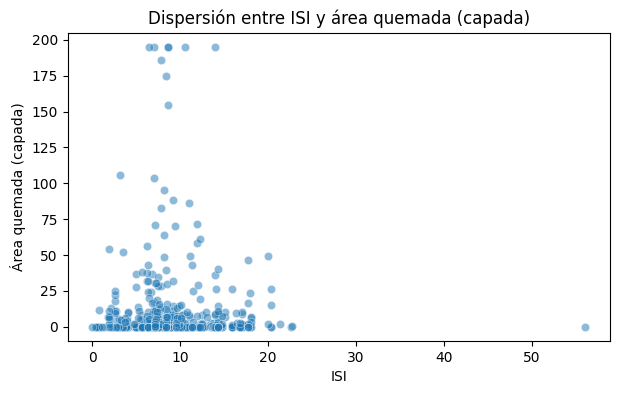

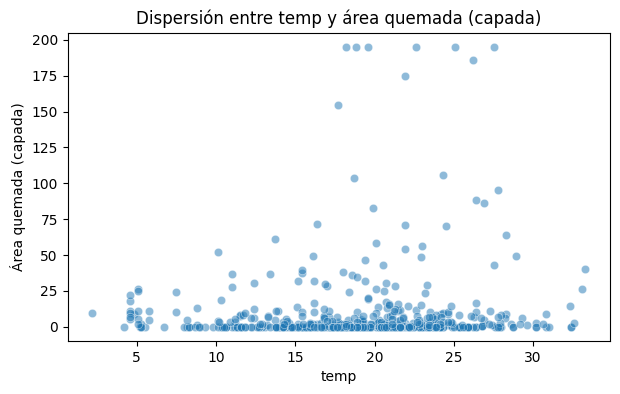

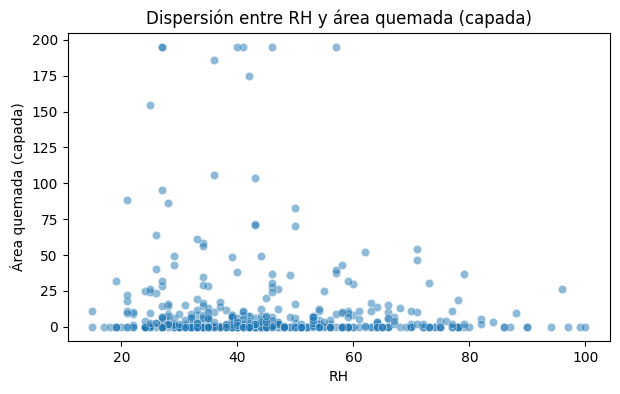

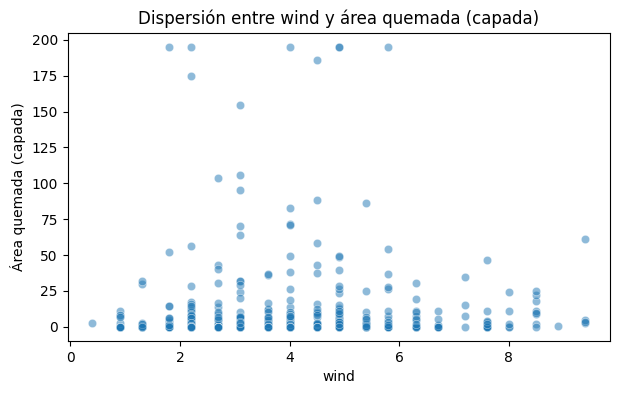

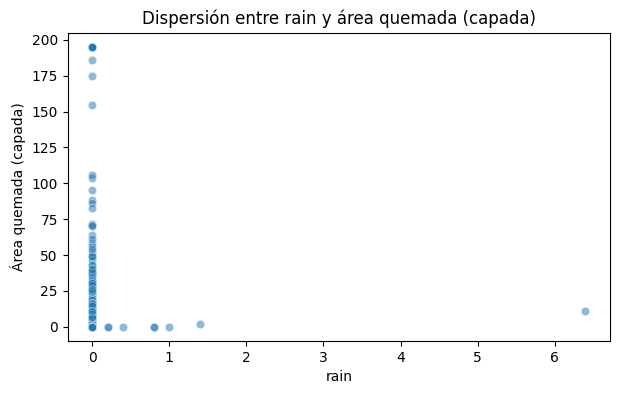

In [24]:
# Lista de variables explicativas a evaluar
variables_evaluar = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Scatterplots con variable dependiente 'area_capped'
for var in variables_evaluar:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=var, y='area_capped', data=df, alpha=0.5)
    plt.title(f'Dispersión entre {var} y área quemada (capada)')
    plt.xlabel(var)
    plt.ylabel('Área quemada (capada)')
    plt.show()

## Reflexione y documente

- Analice cuáles variables presentan una relación más clara (lineal o no lineal) con 'area_capped'.
- Identifique si alguna variable debería ser descartada por ausencia de relación o por baja variabilidad.
- Enuncie brevemente el criterio que se utilizará para escoger las variables finales del modelo.

# 5. Regresión lineal, evaluación y revisión de supuestos

En esta sección se ajustará el modelo de regresión lineal y se evaluará cuantitativamente su desempeño. Posteriormente, se revisarán críticamente los principales supuestos del modelo.

## Ajuste del modelo y evaluación métrica

1. Ajuste el modelo de regresión lineal usando las variables numéricas seleccionadas.
2. Calcule los siguientes indicadores de desempeño:
   - R² (coeficiente de determinación)
   - MAE (error absoluto medio)
   - RMSE (raíz del error cuadrático medio)
3. Interprete el significado de los resultados en el contexto del área quemada.

In [25]:
# Ajuste del modelo y métricas de desempeño
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

variables_modelo = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X = df[variables_modelo]
y = df['area_capped']
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
residuos = y - y_pred

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R² (coeficiente de determinación): {r2:.3f}')
print(f'MAE (error absoluto medio): {mae:.2f}')
print(f'RMSE (raíz del error cuadrático medio): {rmse:.2f}')

R² (coeficiente de determinación): 0.020
MAE (error absoluto medio): 13.66
RMSE (raíz del error cuadrático medio): 27.82


## Comparación visual de valores reales y predichos

A continuación, compare la distribución de los valores de área real contra los valores predichos por el modelo mediante boxplots.

C:\Users\Juan Pablo Reyes\AppData\Local\Temp\ipykernel_21716\3244287867.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y='Área quemada', data=data_long, palette='Set1')


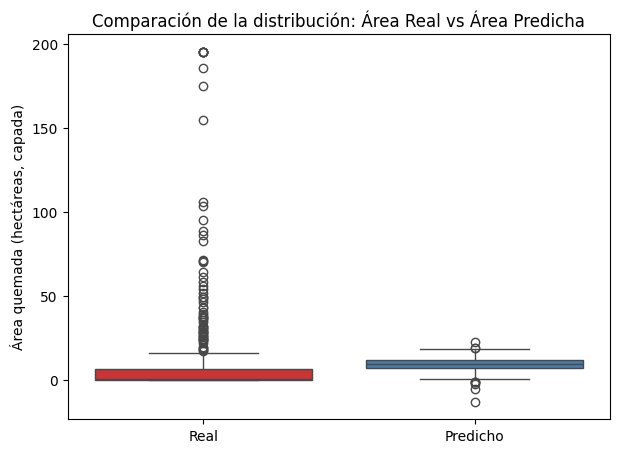

In [26]:
# Comparar la distribución de valores reales y valores predichos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datos_comparacion = pd.DataFrame({
    'Real': df['area_capped'],
    'Predicho': y_pred
})
data_long = pd.melt(datos_comparacion, var_name='Tipo', value_name='Área quemada')

plt.figure(figsize=(7,5))
sns.boxplot(x='Tipo', y='Área quemada', data=data_long, palette='Set1')
plt.title('Comparación de la distribución: Área Real vs Área Predicha')
plt.ylabel('Área quemada (hectáreas, capada)')
plt.xlabel('')
plt.show()

## Boxplot de los errores absolutos frente a medidas de tendencia de área_capped

Observe cómo se comparan los errores absolutos del modelo frente a la media, mediana y desviación estándar de la variable objetivo.

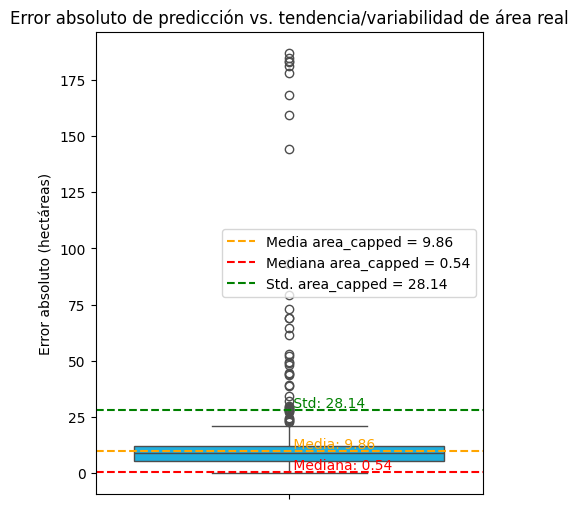

In [27]:
# Boxplot de errores absolutos contra medias y dispersión de area_capped
errores_absolutos = np.abs(df['area_capped'] - y_pred)
media_area = df['area_capped'].mean()
mediana_area = df['area_capped'].median()
std_area = df['area_capped'].std()

plt.figure(figsize=(5,6))
sns.boxplot(y=errores_absolutos, color='deepskyblue')
plt.title('Error absoluto de predicción vs. tendencia/variabilidad de área real')
plt.ylabel('Error absoluto (hectáreas)')

plt.axhline(media_area, color='orange', linestyle='--', label=f"Media area_capped = {media_area:.2f}")
plt.axhline(mediana_area, color='red', linestyle='--', label=f"Mediana area_capped = {mediana_area:.2f}")
plt.axhline(std_area, color='green', linestyle='--', label=f"Std. area_capped = {std_area:.2f}")

plt.text(0, media_area, f" Media: {media_area:.2f}", color='orange', va='bottom')
plt.text(0, mediana_area, f" Mediana: {mediana_area:.2f}", color='red', va='bottom')
plt.text(0, std_area, f" Std: {std_area:.2f}", color='green', va='bottom')

plt.legend()
plt.show()

## Reflexione

- Analice el valor de cada métrica. ¿El modelo explica una porción significativa de la variabilidad? ¿Qué tan grandes son los errores respecto al rango observado del área?
- Si alguna métrica indica mal ajuste, proponga posibles mejoras para futuras iteraciones.

---

## Revisión gráfica y estadística de los supuestos del modelo

4. Revise y justifique los resultados mediante análisis visual y pruebas:
   - Gráfico de residuos vs valores predichos (linealidad y homocedasticidad)
   - Histograma y Q-Q plot de los residuos (normalidad)
   - Test de Shapiro-Wilk para normalidad de residuos

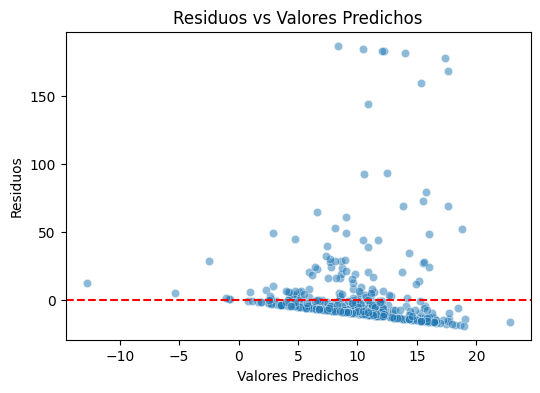

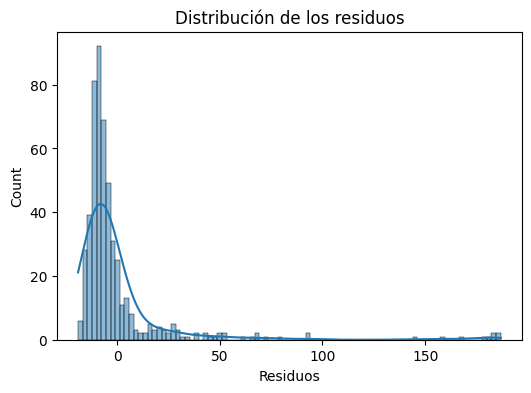

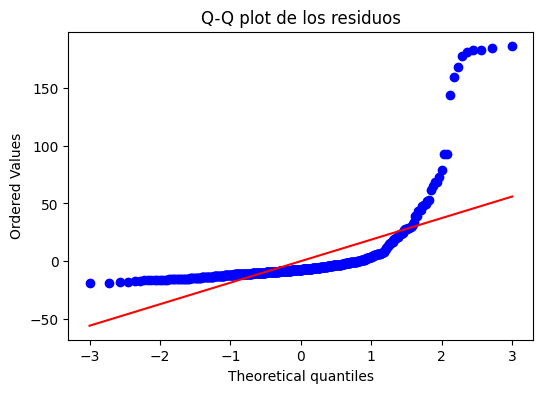

Shapiro-Wilk test: estadístico=0.449, p-valor=0.000
Conclusión: los residuos NO siguen una distribución normal (p < 0.05)


In [28]:
# Análisis gráfico y estadístico de los residuos
import scipy.stats as stats
# Gráfico de residuos vs valores predichos
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Predichos")
plt.show()

# Histograma de residuos
plt.figure(figsize=(6,4))
sns.histplot(residuos, kde=True)
plt.xlabel("Residuos")
plt.title("Distribución de los residuos")
plt.show()

# Q-Q plot de los residuos
plt.figure(figsize=(6,4))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de los residuos")
plt.show()

# Test de normalidad (Shapiro-Wilk)
stat, p = stats.shapiro(residuos)
print(f"Shapiro-Wilk test: estadístico={stat:.3f}, p-valor={p:.3f}")
if p < 0.05:
    print("Conclusión: los residuos NO siguen una distribución normal (p < 0.05)")
else:
    print("Conclusión: no se puede rechazar la normalidad de los residuos (p ≥ 0.05)")

# 6. Modelos avanzados: Regresión polinomial, logarítmica, Ridge y Lasso

En esta sección compare otros modelos que pueden ajustar mejor si existen relaciones no lineales o efectos de regularización importantes en las variables.


## Regresión polinomial (grado 2) y regresión logarítmica sobre el área

Compare a continuación el desempeño y los residuos de la regresión polinomial (cuadrática) y la regresión lineal sobre el logaritmo de 'area_capped'.

In [29]:
# ---- Regresión polinomial (grado 2) ----
from sklearn.preprocessing import PolynomialFeatures
# Variables predictoras
y = df['area_capped']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
modelo_poly = LinearRegression()
modelo_poly.fit(X_poly, y)
y_pred_poly = modelo_poly.predict(X_poly)

# Métricas
mae_poly = mean_absolute_error(y, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
r2_poly = r2_score(y, y_pred_poly)

print("=== Regresión Polinomial (grado 2) ===")
print(f"R²: {r2_poly:.3f}")
print(f"MAE: {mae_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")

=== Regresión Polinomial (grado 2) ===
R²: 0.052
MAE: 13.71
RMSE: 27.37


In [30]:
# ---- Regresión lineal con logaritmo de 'area_capped' ----
y_log = np.log(df['area_capped'] + 1)
modelo_log = LinearRegression()
modelo_log.fit(X, y_log)
y_pred_log = modelo_log.predict(X)
y_pred_log_exp = np.exp(y_pred_log) - 1
mae_log = mean_absolute_error(df['area_capped'], y_pred_log_exp)
rmse_log = np.sqrt(mean_squared_error(df['area_capped'], y_pred_log_exp))
r2_log = r2_score(df['area_capped'], y_pred_log_exp)
print("=== Regresión lineal sobre log(area_capped+1) ===")
print(f"R²: {r2_log:.3f}")
print(f"MAE: {mae_log:.2f}")
print(f"RMSE: {rmse_log:.2f}")

=== Regresión lineal sobre log(area_capped+1) ===
R²: -0.073
MAE: 9.94
RMSE: 29.11


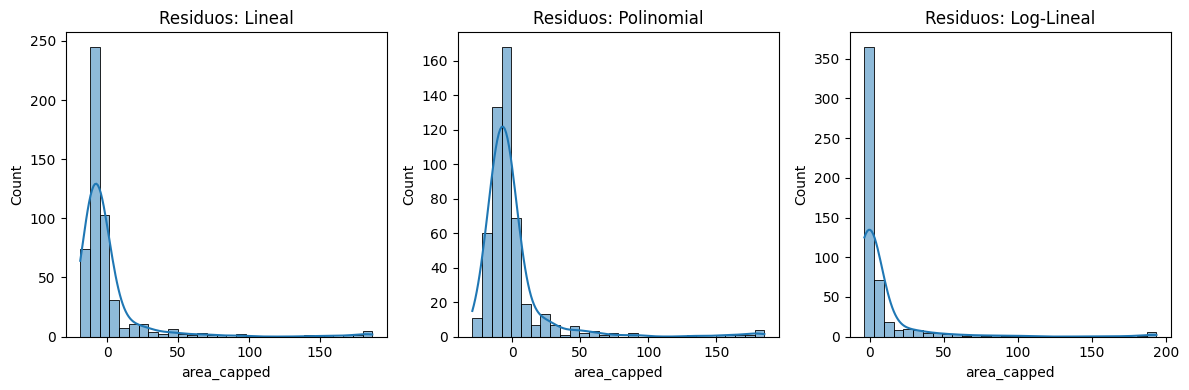

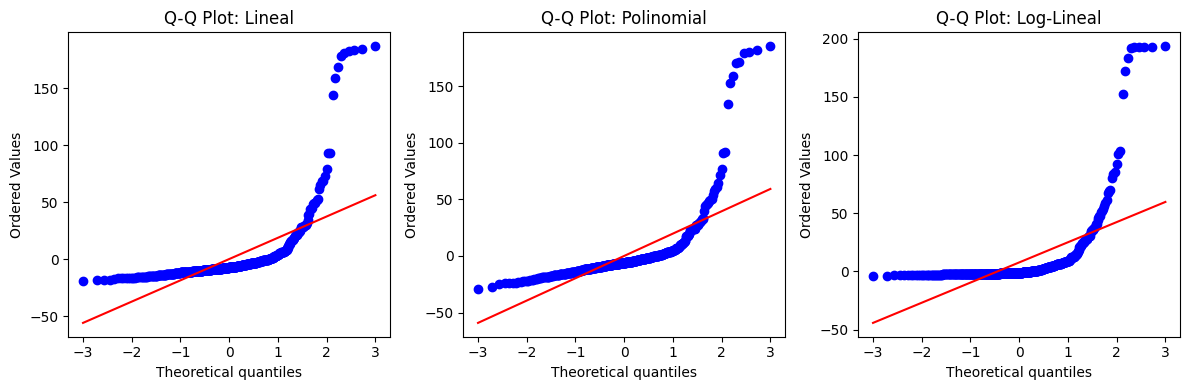

In [31]:
# ---- Comparación de residuos de los tres modelos ----
residuos_poly = y - y_pred_poly
residuos_log = y - y_pred_log_exp

plt.figure(figsize=(12,4))
for i, (res, modelo) in enumerate(zip(
    [residuos, residuos_poly, residuos_log],
    ['Lineal', 'Polinomial', 'Log-Lineal'])):
    plt.subplot(1,3,i+1)
    sns.histplot(res, bins=30, kde=True)
    plt.title(f'Residuos: {modelo}')
plt.tight_layout()
plt.show()

# Q-Q plots
import scipy.stats as stats
plt.figure(figsize=(12,4))
for i, (res, modelo) in enumerate(zip(
    [residuos, residuos_poly, residuos_log],
    ['Lineal', 'Polinomial', 'Log-Lineal'])):
    plt.subplot(1,3,i+1)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {modelo}')
plt.tight_layout()
plt.show()

## Regresión Ridge y Lasso (regularización)
Exploremos cómo los modelos regularizados afectan el ajuste y los coeficientes:

In [33]:
# === Comparación de regresión lineal, Ridge y Lasso (regularización) ===
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)
y_pred_ridge = ridge.predict(X_scaled)

# Modelo Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_scaled, y)
y_pred_lasso = lasso.predict(X_scaled)

def obtener_metricas(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

m_lin = obtener_metricas(y, y_pred)
m_ridge = obtener_metricas(y, y_pred_ridge)
m_lasso = obtener_metricas(y, y_pred_lasso)

comparativo = pd.DataFrame({
    "Lineal": m_lin,
    "Ridge": m_ridge,
    "Lasso": m_lasso
})
print("Resumen comparativo de métricas (ajuste sobre todo el dataset):")
display(comparativo)

# Coeficientes
def print_coefs(name, coef):
    print(f"{name}:" + ", ".join([f"{v}: {c:.3f}" for v, c in zip(variables_modelo, coef)]))
print_coefs('Ridge', ridge.coef_)
print_coefs('Lasso', lasso.coef_)

Resumen comparativo de métricas (ajuste sobre todo el dataset):


,Lineal,Ridge,Lasso
R2,0.020464,0.020464,0.020255
MAE,13.658971,13.657868,13.626948
RMSE,27.820707,27.820710,27.823672


Ridge:FFMC: 0.321, DMC: 2.863, DC: -0.602, ISI: -2.340, temp: 2.054, RH: -1.351, wind: 1.278, rain: -0.389
Lasso:FFMC: 0.139, DMC: 2.587, DC: -0.243, ISI: -2.049, temp: 1.829, RH: -1.355, wind: 1.129, rain: -0.266


# 7. Ejercicios y retos para el estudiante

Realice estos ejercicios para afianzar el análisis crítico, la experimentación y la interpretación aplicada de los modelos.

1. **Profundización en transformación de variables**
   - Ajuste uno o más de los modelos usando la transformación logarítmica y/o polinomial incluyendo una selección personalizada de variables.

2. **Evaluación de variables categóricas**
   - Codifique las variables 'month' y 'day' mediante técnicas como one-hot encoding e inclúyalas en el modelo. Analice si existe mejora en las métricas de ajuste.

3. **Construcción y validación del modelo**
   - Divida el conjunto de datos en entrenamiento y prueba. Ajuste los modelos con los datos de entrenamiento y calcule las métricas de desempeño en ambos subconjuntos. Discuta sobre el posible sobreajuste (overfitting).

4. **Robustez frente a outliers**
   - Modifique los parámetros del capado (pruebe percentiles 5 y 95, 2 y 98, etc.) y observe el efecto sobre el desempeño y los residuos.

5. **Interpretación de resultados**
   - Elija una variable explicativa relevante y analice cómo una variación de una unidad en esa variable afecta el área quemada, según el modelo preferido.

6. **Hipótesis y validación**
   - Plantee una hipótesis sobre posibles relaciones no capturadas explícitamente y desarrolle un mini-experimento para validarlas con técnicas estadísticas o visualizaciones.

7. **Comparativa de residuos**
   - Compare visual y estadísticamente los residuos de cada modelo, discuta cuál sería más fiable en la práctica y por qué.